## Importing the libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


## Importing the dataset

In [3]:
df=pd.read_csv('Telco_Customer_Churn.csv')

# Handle missing or empty values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric, replacing '' with NaN
df.fillna(df.mean(numeric_only=True), inplace=True)

X=df.drop("Churn",axis=1)
y=df["Churn"]

## Taking care of missing data

In [4]:
from sklearn.impute import SimpleImputer
# Identify missing data (assumes that missing data is represented as NaN)
missing_data = df.isnull().sum()
# Print the number of missing entries in each column
print("Missing data:\n",missing_data)

Missing data:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Exploratory Data Analysis (EDA)

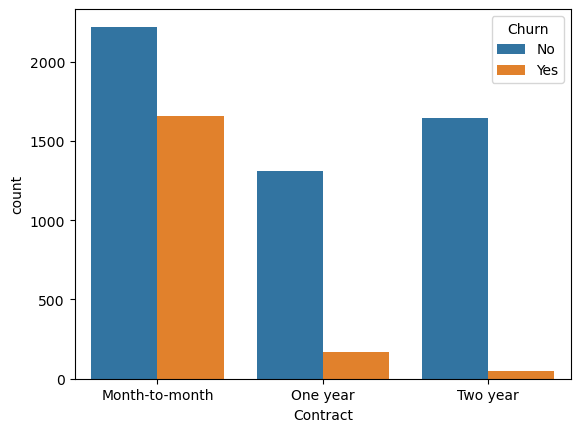

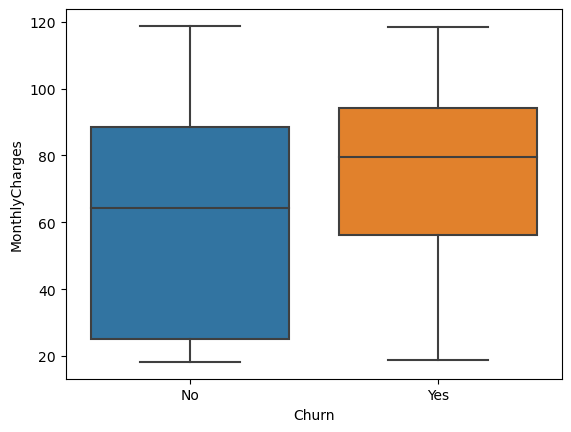

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn by contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

# Monthly charges distribution
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


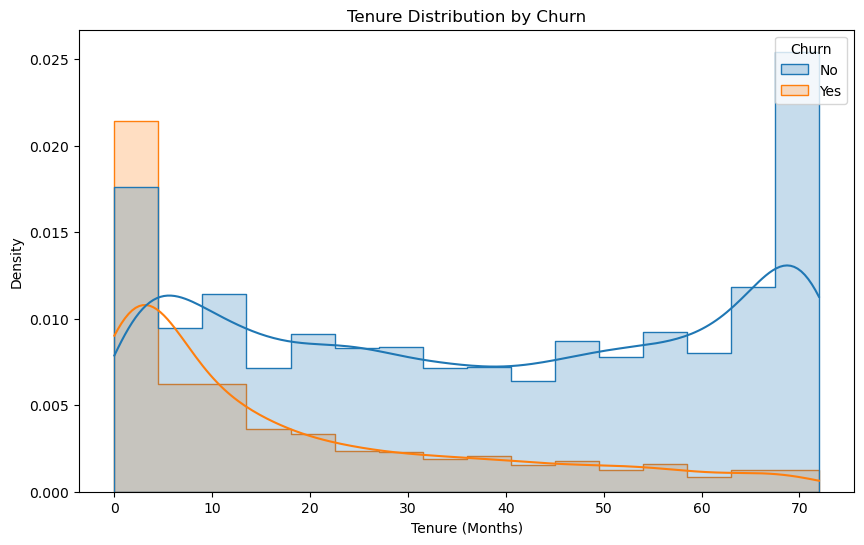

In [12]:
# Churn rate by tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element='step', stat='density')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.show()

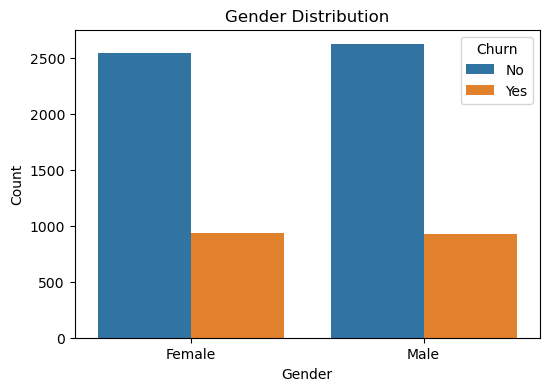

In [14]:
# Churn rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender',data=df, hue='Churn')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

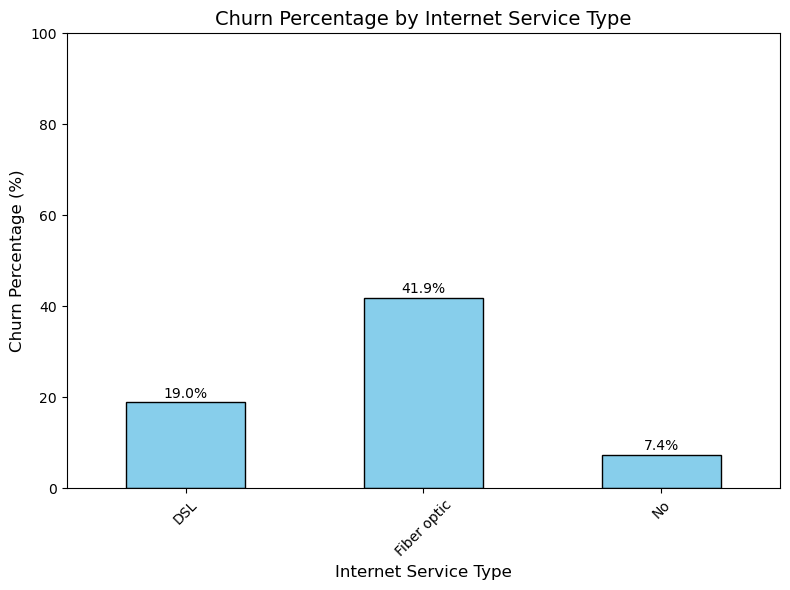

In [15]:
# Calculate churn percentage by InternetService
internet_churn = df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack() * 100

# Extract the percentage of customers who churned (Churn = 'Yes')
churn_percentage = internet_churn["Yes"]

# Plot the bar chart
plt.figure(figsize=(8, 6))
churn_percentage.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Churn Percentage by Internet Service Type", fontsize=14)
plt.xlabel("Internet Service Type", fontsize=12)
plt.ylabel("Churn Percentage (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)  # Set y-axis limit to 100%

# Add percentage values on top of bars
for index, value in enumerate(churn_percentage):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## Encoding categorical data

In [8]:
# Define categorical and numeric columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']
numeric_cols = ['SeniorCitizen','TotalCharges', 'tenure', 'MonthlyCharges' ]

### Encoding the Independent Variable

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# OneHotEncode categorical columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


### Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
# Encode target variable (Churn)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [114]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply encoding and scaling
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [115]:
np.set_printoptions(threshold=np.inf)
print(X_train)


[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 1.33680000e+03
  2.10000000e+01 6.48500000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.12945000e+03
  5.40000000e+01 9.72000000e+01]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.

In [116]:
from sklearn.preprocessing import StandardScaler
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification Algorithms 

### Logistic Regression

In [117]:
# Fit Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict and Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8204400283889283
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



### Gradient Boosting XGBoost


In [118]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

C:\Users\91941\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Logistic Regression

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Random Forest Classifier

In [123]:
print("RandomForest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7920511000709723
[[942  94]
 [199 174]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [119]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7920511000709723
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### Support Vector Machines (SVM)

In [120]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

In [121]:
# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8211497515968772
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

